In [10]:
import pandas as pd
import os

# List of file paths
file_paths = [
    '/AAPL_historical_data.csv',
    '/AMZN_historical_data.csv',
    '/GOOG_historical_data.csv',
    '/META_historical_data.csv',
    '/MSFT_historical_data.csv',
    '/NVDA_historical_data.csv',
    '/TSLA_historical_data.csv'
]

# Dictionary to store the DataFrames for each company
dataframes = {}

# Loop through the file paths and load each CSV into a DataFrame
for file_path in file_paths:
    # Extract the stock ticker from the file name
    ticker = os.path.basename(file_path).split('_')[0]

    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)

    # Store the DataFrame in the dictionary
    dataframes[ticker] = df

# Example: Print the first few rows of Apple's data
print(dataframes['AAPL'].head())

# Now you can access each DataFrame by its ticker symbol, e.g., dataframes['GOOG'], dataframes['TSLA'], etc.

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [14]:
import pandas as pd
from finta import TA

# List of file paths
file_paths = [
    '/AAPL_historical_data.csv',
    '/AMZN_historical_data.csv',
    '/GOOG_historical_data.csv',
    '/META_historical_data.csv',
    '/MSFT_historical_data.csv',
    '/NVDA_historical_data.csv',
    '/TSLA_historical_data.csv'
]
# Dictionary to store the DataFrames for each company
dataframes = {}

# Loop through the file paths and load each CSV into a DataFrame
for file_path in file_paths:
    # Extract the stock ticker from the file name
    ticker = os.path.basename(file_path).split('_')[0]

    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)

    # Calculate technical indicators using finta
    df['SMA_50'] = TA.SMA(df, 50)  # 50-day Simple Moving Average
    df['EMA_20'] = TA.EMA(df, 20)  # 20-day Exponential Moving Average
    df['RSI_14'] = TA.RSI(df)      # 14-day Relative Strength Index
    macd = TA.MACD(df)              # MACD
    df['MACD'] = macd['MACD']
    df['MACD_Signal'] = macd['SIGNAL']
    df['MACD_Hist'] = macd['MACD'] - macd['SIGNAL']  # MACD Histogram

    # Store the DataFrame in the dictionary
    dataframes[ticker] = df

# Example: Print the first few rows of Apple's data with indicators
print(dataframes['AAPL'].head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  SMA_50    EMA_20     RSI_14      MACD  \
Date                                                                         
1980-12-12        0.0           0.0     NaN  0.128348        NaN  0.000000   
1980-12-15        0.0           0.0     NaN  0.124833   0.000000 -0.000150   
1980-12-16        0.0           0.0     NaN  0.120386   0.000000 -0.000468   
1980-12-17        0.0           0.0     NaN  0.118979  16.553131 -0.000501   

In [24]:
import pynance as pn
import pandas as pd

# Example: Load data from a CSV file (You can replace this with your actual data source)
# List of file paths
file_paths = [
    '/AAPL_historical_data.csv',
    '/AMZN_historical_data.csv',
    '/GOOG_historical_data.csv',
    '/META_historical_data.csv',
    '/MSFT_historical_data.csv',
    '/NVDA_historical_data.csv',
    '/TSLA_historical_data.csv'
]
dataframes = {}
for file_path in file_paths:
  df = pd.read_csv(file_path)
  ticker = os.path.basename(file_path).split('_')[0]

  dataframes[ticker] = df
# df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Display the first few rows
print(dataframes['AAPL'].head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [28]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Load your data
file_path = '/AAPL_historical_data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate indicators using pandas-ta
df['SMA_50'] = ta.sma(df['Close'], length=50)  # 50-day Simple Moving Average
df['EMA_20'] = ta.ema(df['Close'], length=20)  # 20-day Exponential Moving Average
df['RSI_14'] = ta.rsi(df['Close'], length=14)  # 14-day Relative Strength Index
macd = ta.macd(df['Close'])  # MACD
df['MACD'] = macd['MACD_12_26_9']
df['MACD_Signal'] = macd['MACDs_12_26_9']
df['MACD_Hist'] = macd['MACDh_12_26_9']
# Drop rows where all specified columns have NaN values
df = df.dropna(subset=['SMA_50', 'EMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist'])

# Now, display the first few rows of the cleaned DataFrame
# print(df.head())


# Display the first few rows of the data
print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1981-02-24  0.107143  0.107143  0.106027  0.106027   0.081736  16979200   
1981-02-25  0.112723  0.113281  0.112723  0.112723   0.086898  19488000   
1981-02-26  0.114397  0.114955  0.114397  0.114397   0.088188  10841600   
1981-02-27  0.118304  0.119420  0.118304  0.118304   0.091200  14761600   
1981-03-02  0.118862  0.119420  0.118862  0.118862   0.091630  11760000   

            Dividends  Stock Splits    SMA_50    EMA_20     RSI_14      MACD  \
Date                                                                           
1981-02-24        0.0           0.0  0.132578  0.120548  31.765327 -0.007082   
1981-02-25        0.0           0.0  0.132266  0.119803  40.153912 -0.006815   
1981-02-26        0.0           0.0  0.132120  0.119288  42.071262 -0.006395   
1981-02-27        0.0           0.0  0.132232  0.119194  46.388421 -0.0056

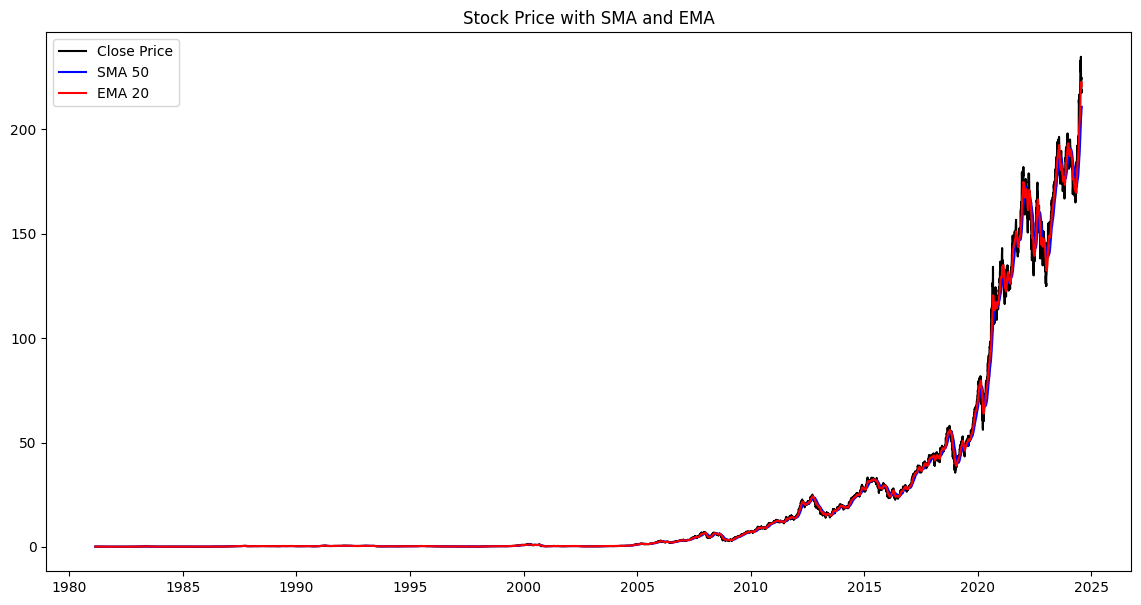

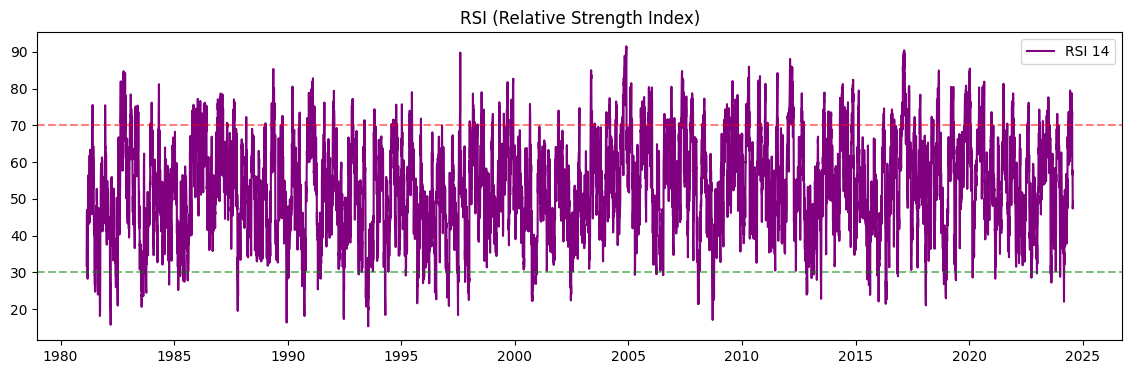

In [ ]:
# Plot Closing Price, SMA, and EMA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='black')
plt.plot(df.index, df['SMA_50'], label='SMA 50', color='blue')
plt.plot(df.index, df['EMA_20'], label='EMA 20', color='red')
plt.title('Stock Price with SMA and EMA')
plt.legend(loc='best')
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought line
plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Oversold line
plt.title('RSI (Relative Strength Index)')
plt.legend(loc='best')
plt.show()


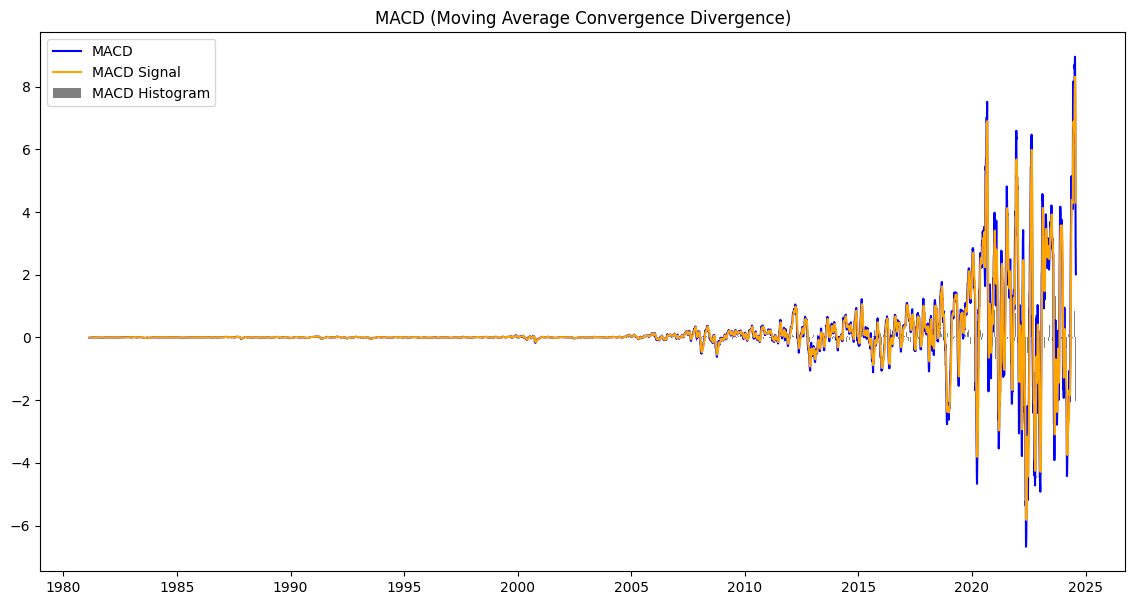

In [30]:
# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['MACD_Signal'], label='MACD Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='gray')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.legend(loc='best')
plt.show()